# **Confronto tra algoritmi di ordinamento**
In questo notebook vado a svolgere un confronto tra i due algoritmi di ordinamento **Insertion sort** e **Counting sort** per lo stesso array in input.
In particolar modo pongo attenzione sui tempi impiegati dai due algoritmi e sulla correttezza dei risultati.
Le aspettative per i due algoritmi sono le seguenti:
- **Insertion sort**: è un algoritmo semplice che costruisce l'array di output andando a confrontare ogni nuovo elemento con quelli già ordinati in precedenza andandolo ad inserire nella posizione corretta. Risulta quindi un algoritmo efficiente per piccoli array o per array quasi ordinati ma ha una complessità di **_θ(n²)_** nei casi peggiori, con _n_ lunghezza dell'array.
- **Counting sort**: è un algoritmo che non si basa sui confronti tra gli elementi dell'array ma va ad utilizzare un array ausiliario per poter contare le occorrenze di ogni valore dell'array in input, grazie a questo array di appoggio va poi a creare quello di output. È efficiente per array con un intervallo di valori limitato ed ha una complessità di **_θ(n+k)_** con _n_ lunghezza dell'array e _k_ il valore massimo ovvero l'intervallo dei valori.

Di seguito sono riportate tre funzioni, in ordine: algoritmo di **Insertion sort**, algoritmo di **Counting sort** e funzione per creare un array random, partendo dai volori _n_ e _k_, da dare in input agli algoritmi di ordinamento.

In [124]:
def InsertionSort(A, n):
    for j in range(1, n):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i-1
        A[i + 1] = key
    return A

In [125]:
def CountingSort(A, k):
    B = [0] * (len(A))
    C = [0] * (k)
    for j in range(len(A)):
        C[A[j]] = C[A[j]] + 1
    for i in range(1, k):
        C[i] = C[i] + C[i - 1]
    for j in range(len(A) -1, -1, -1):
        B[C[A[j]] -1] = A[j]
        C[A[j]] = C[A[j]] - 1
    return B

In [126]:
def generateRandomArray(n, k):
    import random
    A = [0] * (n)
    for i in range(n):
        A[i] = random.randint(0, k - 1)
    return A

In [127]:
import matplotlib.pyplot as plt

def plot_graph(n_values, insertion_times, counting_times):
    plt.plot(list(n_values), insertion_times, marker='o', label='Insertion Sort')
    plt.plot(list(n_values), counting_times, marker='s', label='Counting Sort')
    plt.xlabel('Dimensione array (n)')
    plt.ylabel('Tempo medio di esecuzione (s)')
    plt.legend()
    plt.show()

Andiamo adesso a considerare tutti i casi possibili al variare di _n_ e _k_ per confrontare al meglio i due algoritmi di ordinamento

## Test con array di lunghezza ridotta e intervallo di valori limitato

Array iniziale:  [7, 2, 8, 7, 1, 6, 0, 7, 3, 3, 9, 8, 4, 6, 1, 4, 3, 5, 9, 0, 2, 0, 5, 6, 1, 0, 6, 0, 3, 3, 4, 3, 4, 8, 0, 5, 1, 5, 4, 0, 9, 4, 1, 0, 9, 8, 7, 8, 5, 6, 7, 9, 8, 5, 0, 2, 0, 5, 8, 0, 3, 2, 5, 8, 4, 1, 1, 2, 6, 6, 3, 5, 3, 8, 0, 8, 6, 3, 6, 6, 2, 9, 7, 4, 4, 5, 1, 5, 2, 5, 0, 1, 9, 2, 0, 9, 8, 7, 9, 3]
Array ordinato usando Insertion sort:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Tempo impiegato da Insertion Sort: 0.000206 secondi
Array ordinato usando Counting sort:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8,

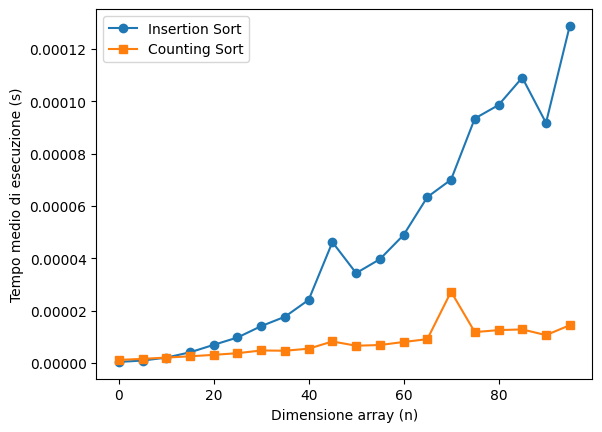

In [128]:
import time

n = 100
k = 10
A = generateRandomArray(n, k)
B = A.copy()

print("Array iniziale: ", A)

# Misura il tempo impiegato da Insertion Sort
start_time = time.time()
insertionSortResult = InsertionSort(A, n)
end_time = time.time()
print("Array ordinato usando Insertion sort: ", insertionSortResult)
print("Tempo impiegato da Insertion Sort: {:.6f} secondi".format(end_time - start_time))

# Misura il tempo impiegato da Counting Sort
start_time = time.time()
countingSortResults = CountingSort(B, k)
end_time = time.time()
print("Array ordinato usando Counting sort: ", countingSortResults)
print("Tempo impiegato da Counting Sort: {:.6f} secondi".format(end_time - start_time))

# Ripeto il test per generare un grafico
n_values = range(0, 100, 5)
k1 = 10
num_runs = 20
insertion_times = []
counting_times = []

for n1 in n_values:
    temp_insertion = []
    temp_counting = []
    for _ in range(num_runs):
        A1= generateRandomArray(n1, k1)
        B1 = A1.copy()

        start_time = time.time()
        InsertionSort(A1, n1)
        temp_insertion.append(time.time() - start_time)

        start_time = time.time()
        CountingSort(B1, k1)
        temp_counting.append(time.time() - start_time)
    # Media dei tempi per questo n
    insertion_times.append(sum(temp_insertion) / num_runs)
    counting_times.append(sum(temp_counting) / num_runs)

plot_graph(n_values, insertion_times, counting_times)

### Commento sui risultati
Possiamo notare che in questo caso il tempo impiegato dai due algoritmi non differisce di molto, entrambi hanno prestazioni ottimali nonostante la differenza nelle complessità in cui una è quadratica e l'altra lineare. Inoltre l'array ausiliario del **Counting sort** utilizza poca memoria.

## Test con array di lunghezza elevata e intervallo di valori ampio

Array iniziale:  [3645, 8072, 2269, 2564, 6517, 3023, 759, 1430, 1456, 1113, 2906, 3366, 5416, 7278, 5567, 9911, 2610, 8093, 2225, 7941, 9460, 1370, 661, 4077, 2671, 8751, 1578, 4423, 2212, 6624, 336, 3647, 3918, 9152, 7486, 6451, 1354, 2015, 5186, 5212, 3639, 2176, 819, 7210, 3299, 411, 2842, 2473, 9900, 2395, 5246, 3748, 8825, 8559, 889, 6652, 291, 735, 8006, 5012, 4257, 5636, 6264, 9646, 5785, 8779, 2818, 3519, 4520, 3755, 513, 4872, 9674, 7011, 5027, 2372, 7045, 6222, 8909, 4236, 4144, 7881, 8723, 3567, 8691, 1012, 9020, 2965, 961, 983, 4112, 564, 1106, 1246, 7772, 7391, 1147, 5183, 5314, 7344, 2127, 3983, 9211, 9861, 783, 3411, 941, 187, 3055, 1063, 2229, 7251, 1788, 253, 3726, 7725, 4062, 4257, 993, 2543, 7763, 2094, 3108, 4859, 4465, 6289, 9914, 7059, 8805, 3279, 6330, 569, 2144, 8526, 3056, 7084, 9023, 6097, 7941, 9213, 4552, 3921, 9333, 2385, 5122, 3592, 322, 3138, 9367, 1320, 9539, 1319, 3231, 100, 5678, 8901, 4567, 6798, 515, 9202, 4990, 6906, 6730, 1591, 9858, 5734, 2079, 5

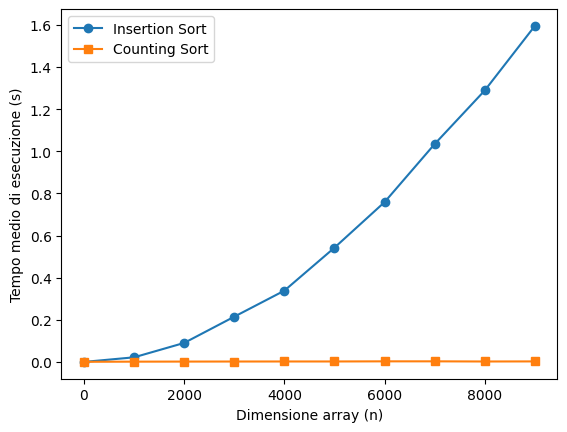

In [129]:
import time

n = 10000
k = 10000
A = generateRandomArray(n, k)
B = A.copy()

print("Array iniziale: ", A)

# Misura il tempo impiegato da Insertion Sort
start_time = time.time()
insertionSortResult = InsertionSort(A, n)
end_time = time.time()
print("Array ordinato usando Insertion sort: ", insertionSortResult)
print("Tempo impiegato da Insertion Sort: {:.6f} secondi".format(end_time - start_time))

# Misura il tempo impiegato da Counting Sort
start_time = time.time()
countingSortResults = CountingSort(B, k)
end_time = time.time()
print("Array ordinato usando Counting sort: ", countingSortResults)
print("Tempo impiegato da Counting Sort: {:.6f} secondi".format(end_time - start_time))

# Ripeto il test per generare un grafico
n_values = range(0, 10000, 1000)
k1 = 10000
num_runs = 5
insertion_times = []
counting_times = []

for n1 in n_values:
    temp_insertion = []
    temp_counting = []
    for _ in range(num_runs):
        A1= generateRandomArray(n1, k1)
        B1 = A1.copy()

        start_time = time.time()
        InsertionSort(A1, n1)
        temp_insertion.append(time.time() - start_time)

        start_time = time.time()
        CountingSort(B1, k1)
        temp_counting.append(time.time() - start_time)
    # Media dei tempi per questo n
    insertion_times.append(sum(temp_insertion) / num_runs)
    counting_times.append(sum(temp_counting) / num_runs)

plot_graph(n_values, insertion_times, counting_times)

### Commento sui risultati
In questo caso notiamo come **Insertion sort** soffre della sua complessità quadratica legata al valore di _n_ andando a ordinare l'array in tempi elevati risultando così inefficiente.
Invece **Counting sort** avendo complessità lineare è legato alla grandezza di _k_, al suo aumentare impiega più tempo per ordinare l'array, inoltre il vettore ausiliario occupa molta memoria. Tuttavia rimane più efficiente rispetto a **Insertion sort** per grandi array a patto di avere una distanza tra _k_ ed _n_ non troppo eccessiva.

## Test con array di lunghezza elevata e intervallo di valori limitato

Array iniziale:  [1, 7, 1, 5, 0, 7, 6, 7, 9, 5, 4, 7, 8, 3, 8, 9, 6, 9, 9, 6, 8, 4, 9, 3, 9, 2, 6, 9, 3, 6, 8, 2, 6, 8, 3, 7, 5, 4, 5, 8, 6, 2, 8, 8, 1, 7, 7, 8, 7, 9, 1, 8, 2, 5, 1, 0, 6, 9, 0, 9, 6, 1, 6, 9, 9, 7, 4, 2, 7, 4, 6, 8, 3, 9, 7, 8, 2, 2, 3, 3, 7, 2, 6, 4, 5, 4, 2, 1, 4, 0, 3, 0, 3, 7, 7, 5, 1, 0, 7, 3, 1, 2, 0, 0, 7, 9, 6, 8, 1, 3, 1, 3, 6, 2, 6, 0, 6, 9, 9, 3, 1, 4, 4, 6, 2, 7, 7, 0, 4, 9, 4, 4, 3, 7, 9, 7, 0, 5, 9, 1, 7, 8, 8, 7, 5, 9, 1, 2, 8, 4, 4, 7, 7, 7, 4, 2, 0, 0, 9, 1, 1, 6, 7, 9, 4, 8, 4, 0, 3, 1, 5, 8, 6, 4, 9, 5, 8, 2, 4, 7, 1, 5, 4, 0, 6, 3, 0, 9, 6, 6, 8, 5, 5, 1, 5, 1, 7, 7, 9, 3, 0, 6, 4, 3, 3, 6, 7, 1, 9, 3, 1, 1, 8, 5, 3, 8, 4, 0, 7, 1, 5, 3, 4, 2, 7, 2, 5, 7, 1, 6, 2, 6, 4, 6, 1, 7, 0, 2, 6, 3, 2, 2, 9, 2, 4, 1, 8, 4, 6, 9, 1, 5, 7, 6, 8, 3, 4, 7, 7, 3, 3, 0, 8, 0, 7, 1, 4, 9, 2, 2, 4, 6, 3, 8, 2, 1, 1, 4, 0, 1, 5, 3, 8, 1, 1, 4, 6, 7, 6, 0, 4, 6, 9, 8, 8, 7, 6, 0, 5, 4, 2, 3, 2, 8, 2, 5, 7, 2, 8, 6, 2, 7, 3, 5, 1, 3, 2, 0, 4, 2, 7, 4, 0, 8, 6, 3, 2, 1

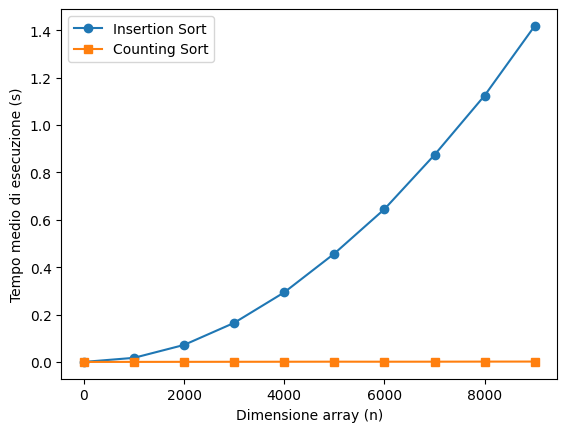

In [130]:
import time

n = 10000
k = 10
A = generateRandomArray(n, k)
B = A.copy()

print("Array iniziale: ", A)

# Misura il tempo impiegato da Insertion Sort
start_time = time.time()
insertionSortResult = InsertionSort(A, n)
end_time = time.time()
print("Array ordinato usando Insertion sort: ", insertionSortResult)
print("Tempo impiegato da Insertion Sort: {:.6f} secondi".format(end_time - start_time))

# Misura il tempo impiegato da Counting Sort
start_time = time.time()
countingSortResults = CountingSort(B, k)
end_time = time.time()
print("Array ordinato usando Counting sort: ", countingSortResults)
print("Tempo impiegato da Counting Sort: {:.6f} secondi".format(end_time - start_time))

# Ripeto il test per generare un grafico
n_values = range(0, 10000, 1000)
k1 = 10
num_runs = 5
insertion_times = []
counting_times = []

for n1 in n_values:
    temp_insertion = []
    temp_counting = []
    for _ in range(num_runs):
        A1= generateRandomArray(n1, k1)
        B1 = A1.copy()

        start_time = time.time()
        InsertionSort(A1, n1)
        temp_insertion.append(time.time() - start_time)

        start_time = time.time()
        CountingSort(B1, k1)
        temp_counting.append(time.time() - start_time)
    # Media dei tempi per questo n
    insertion_times.append(sum(temp_insertion) / num_runs)
    counting_times.append(sum(temp_counting) / num_runs)

plot_graph(n_values, insertion_times, counting_times)

### Commento sui risultati
In questo caso notiamo come **Insertion sort** soffre ancora della sua complessità quadratica legata al valore di _n_ andando ad aumentare rapidamente i tempi di risoluzione.
Il **Counting sort** invece utilizza un array ausiliario che occupa poca memoria dato il valore basso di _k_. È prorpio per questo motivo che nella complessità lineare _k_ ha un impatto trascurabile andando a rendere l'algoritmo molto più efficiente rispetto all'**Insertion sort**

## Test con array di lunghezza ridotta e intervallo di valori ampio

Array iniziale:  [250, 6811, 3749, 5272, 9196, 700, 4932, 6820, 9180, 12, 1327, 1347, 9451, 428, 1263, 7439, 6802, 4004, 9203, 7298, 8808, 3234, 8299, 9535, 485, 2426, 6187, 2925, 1836, 3702, 304, 3202, 6412, 5733, 6036, 4877, 6989, 4744, 184, 1642, 6624, 195, 4035, 6473, 7710, 7055, 4039, 7611, 803, 1159, 9058, 7228, 1678, 5781, 8632, 5355, 4799, 1821, 6082, 6841, 4384, 5656, 2453, 9742, 9821, 9878, 3628, 4262, 5023, 7608, 7622, 8214, 2371, 4355, 4900, 6523, 5761, 1714, 4966, 1883, 357, 439, 2943, 9841, 8748, 6901, 3366, 6995, 3520, 8853, 2207, 7086, 4366, 1688, 3504, 1911, 2884, 848, 203, 1148]
Array ordinato usando Insertion sort:  [12, 184, 195, 203, 250, 304, 357, 428, 439, 485, 700, 803, 848, 1148, 1159, 1263, 1327, 1347, 1642, 1678, 1688, 1714, 1821, 1836, 1883, 1911, 2207, 2371, 2426, 2453, 2884, 2925, 2943, 3202, 3234, 3366, 3504, 3520, 3628, 3702, 3749, 4004, 4035, 4039, 4262, 4355, 4366, 4384, 4744, 4799, 4877, 4900, 4932, 4966, 5023, 5272, 5355, 5656, 5733, 5761, 5781, 6036

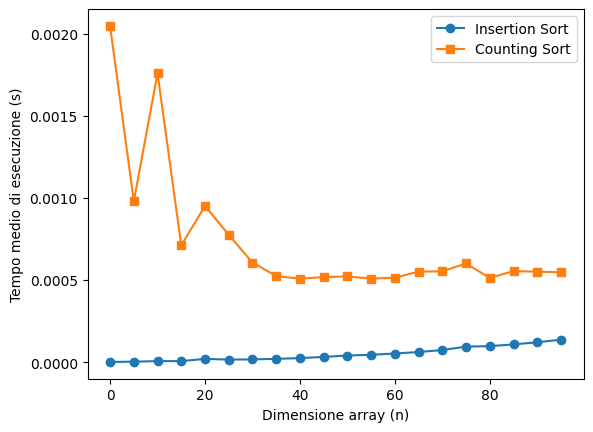

In [131]:
import time

n = 100
k = 10000
A = generateRandomArray(n, k)
B = A.copy()

print("Array iniziale: ", A)

# Misura il tempo impiegato da Insertion Sort
start_time = time.time()
insertionSortResult = InsertionSort(A, n)
end_time = time.time()
print("Array ordinato usando Insertion sort: ", insertionSortResult)
print("Tempo impiegato da Insertion Sort: {:.6f} secondi".format(end_time - start_time))

# Misura il tempo impiegato da Counting Sort
start_time = time.time()
countingSortResults = CountingSort(B, k)
end_time = time.time()
print("Array ordinato usando Counting sort: ", countingSortResults)
print("Tempo impiegato da Counting Sort: {:.6f} secondi".format(end_time - start_time))

# Ripeto il test per generare un grafico
n_values = range(0, 100, 5)
k1 = 10000
num_runs = 20
insertion_times = []
counting_times = []

for n1 in n_values:
    temp_insertion = []
    temp_counting = []
    for _ in range(num_runs):
        A1= generateRandomArray(n1, k1)
        B1 = A1.copy()

        start_time = time.time()
        InsertionSort(A1, n1)
        temp_insertion.append(time.time() - start_time)

        start_time = time.time()
        CountingSort(B1, k1)
        temp_counting.append(time.time() - start_time)
    # Media dei tempi per questo n
    insertion_times.append(sum(temp_insertion) / num_runs)
    counting_times.append(sum(temp_counting) / num_runs)

plot_graph(n_values, insertion_times, counting_times)

### Commento sui risultati
**Insertion sort** torna ad essere efficiente per via del basso valore di _n_ avendo quindi pochi elementi dell'array da dover ordinare.
Al contrario **Counting sort** ha un array ausiliario che occupa molta memoria nonostante il numero ridotto di elementi da ordinare, di conseguenza la complessità è dominata dal valore elevato di _k_ rendendo l'algoritmo inefficiente. 

## Test con array ordinato

Array iniziale:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

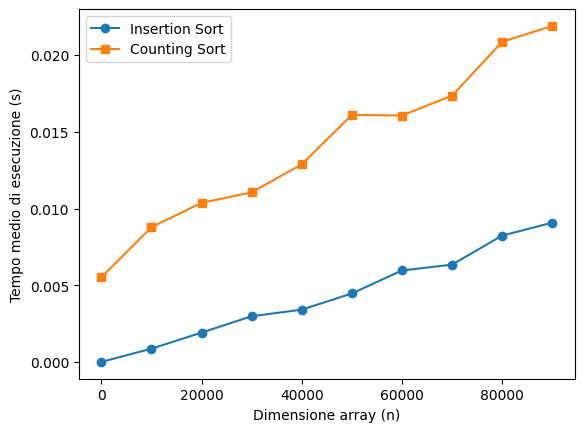

In [132]:
import time

# Genera un array ordinato di dimensione n con valori tra 0 e k-1
n = 100000
k = 100000
A = list(range(n))
B = A.copy()

print("Array iniziale: ", A)

# Misura il tempo impiegato da Insertion Sort
start_time = time.time()
insertionSortResult = InsertionSort(A, n)
end_time = time.time()
print("Array ordinato usando Insertion sort: ", insertionSortResult)
print("Tempo impiegato da Insertion Sort: {:.6f} secondi".format(end_time - start_time))

# Misura il tempo impiegato da Counting Sort
start_time = time.time()
countingSortResults = CountingSort(B, k)
end_time = time.time()
print("Array ordinato usando Counting sort: ", countingSortResults)
print("Tempo impiegato da Counting Sort: {:.6f} secondi".format(end_time - start_time))

# Ripeto il test per generare un grafico
n_values = range(0, 100000, 10000)
k1 = 100000
num_runs = 5
insertion_times = []
counting_times = []

for n1 in n_values:
    temp_insertion = []
    temp_counting = []
    for _ in range(num_runs):
        A1= list(range(n1))
        B1 = A1.copy()

        start_time = time.time()
        InsertionSort(A1, n1)
        temp_insertion.append(time.time() - start_time)

        start_time = time.time()
        CountingSort(B1, k1)
        temp_counting.append(time.time() - start_time)
    # Media dei tempi per questo n
    insertion_times.append(sum(temp_insertion) / num_runs)
    counting_times.append(sum(temp_counting) / num_runs)

plot_graph(n_values, insertion_times, counting_times)

### Commento sui risultati
In questo caso non andiamo più ad utilizzare la funzione per generare un array casuale ma passiamo agli algoritmi array già ordinati.
Quello che notiamo è che **Insertion sort** confronta solo _n_-1 elementi e trovandoli già ordinati non ha necessità di effettuare spostamenti. Questo è dunque il caso migliore per questo algoritmo la cui complessità adesso diventa **_θ(n)_**.
**Counting sort** invece non basandosi sui confronti non risente dell'ordinamento iniziale dell'array, ciò implica che i suoi tempi restano invariati.
In questo caso quindi **Insertion sort** è più efficiente di **Counting sort**

## Test con array ordinato al contrario

Array iniziale:  [99999, 99998, 99997, 99996, 99995, 99994, 99993, 99992, 99991, 99990, 99989, 99988, 99987, 99986, 99985, 99984, 99983, 99982, 99981, 99980, 99979, 99978, 99977, 99976, 99975, 99974, 99973, 99972, 99971, 99970, 99969, 99968, 99967, 99966, 99965, 99964, 99963, 99962, 99961, 99960, 99959, 99958, 99957, 99956, 99955, 99954, 99953, 99952, 99951, 99950, 99949, 99948, 99947, 99946, 99945, 99944, 99943, 99942, 99941, 99940, 99939, 99938, 99937, 99936, 99935, 99934, 99933, 99932, 99931, 99930, 99929, 99928, 99927, 99926, 99925, 99924, 99923, 99922, 99921, 99920, 99919, 99918, 99917, 99916, 99915, 99914, 99913, 99912, 99911, 99910, 99909, 99908, 99907, 99906, 99905, 99904, 99903, 99902, 99901, 99900, 99899, 99898, 99897, 99896, 99895, 99894, 99893, 99892, 99891, 99890, 99889, 99888, 99887, 99886, 99885, 99884, 99883, 99882, 99881, 99880, 99879, 99878, 99877, 99876, 99875, 99874, 99873, 99872, 99871, 99870, 99869, 99868, 99867, 99866, 99865, 99864, 99863, 99862, 99861, 99860, 99

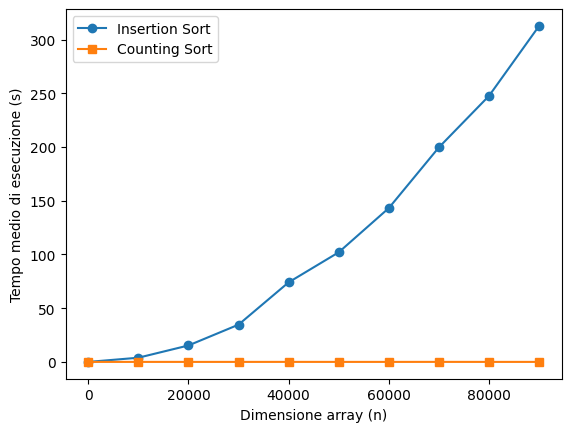

In [133]:
import time

# Genera un array ordinato al contrario di dimensione n con valori tra 0 e k-1
n = 100000
k = 100000
A = list(range(n - 1, -1, -1))
B = A.copy()

print("Array iniziale: ", A)

# Misura il tempo impiegato da Insertion Sort
start_time = time.time()
insertionSortResult = InsertionSort(A, n)
end_time = time.time()
print("Array ordinato usando Insertion sort: ", insertionSortResult)
print("Tempo impiegato da Insertion Sort: {:.6f} secondi".format(end_time - start_time))

# Misura il tempo impiegato da Counting Sort
start_time = time.time()
countingSortResults = CountingSort(B, k)
end_time = time.time()
print("Array ordinato usando Counting sort: ", countingSortResults)
print("Tempo impiegato da Counting Sort: {:.6f} secondi".format(end_time - start_time))

# Ripeto il test per generare un grafico
n_values = range(0, 100000, 10000)
k1 = 100000
num_runs = 5
insertion_times = []
counting_times = []

for n1 in n_values:
    temp_insertion = []
    temp_counting = []
    for _ in range(num_runs):
        A1 = list(range(n - 1, -1, -1))
        B1 = A1.copy()

        start_time = time.time()
        InsertionSort(A1, n1)
        temp_insertion.append(time.time() - start_time)

        start_time = time.time()
        CountingSort(B1, k1)
        temp_counting.append(time.time() - start_time)
    # Media dei tempi per questo n
    insertion_times.append(sum(temp_insertion) / num_runs)
    counting_times.append(sum(temp_counting) / num_runs)

plot_graph(n_values, insertion_times, counting_times)

### Commento sui risultati
Anche in questo caso non andiamo più ad utilizzare la funzione per generare un array casuale ma passiamo agli algoritmi array già ordinati al contrario.
Notiamo che **Insertion sort** confronta tutti gli elementi e ha necessità di spostarli tutti quanti poiché nessuno è nella posizione corretta. Questo è dunque il caso peggiore per questo algoritmo e la sua complessità torna ad essere **_θ(n²)_**.
**Counting sort**, come nel caso precedente, non basandosi sui confronti non risente dell'ordinamento iniziale dell'array, quindi i suoi tempi restano invariati.
In questo caso **Counting sort** è nettamente più efficiente di **Insertion sort**


## Considerazioni finali
Analizzando tutti i casi è evidente che la scelta dell'algoritmo di ordinamento dipende dalla lunghezza e dall'intervallo di valori dell'array di input.
In particolar modo:
- **Insertion sort** è efficiente per array piccoli o quasi ordinati ma soffre gravemente nei casi peggiori di array grandi o ordinati al contrario. La sua complessità è dunque **_θ(n²)_**.
- **Counting sort** è efficiente per array che abbiano un intervallo di valori limitato indipendentemente dal numero di elementi che compongono l'array ma risulta inefficiente, in particolare per quanto riguarda la memoria, per array con _k_ molto più grande di _n_. La sua complessità è dunque **_θ(n+k)_**.